# Übungsblatt 3: sWeights

 * [Aufgabe 1](#Aufgabe-1)
 * [Aufgabe 2](#Aufgabe-2)

Eine experimentelle Verteilung in den Variablen $(x, m)$ habe eine Signalkomponente $s(x, m)$ = $s(x)s(m)$ und eine Untergrundkomponente $b(x,m)$ = $b(x)b(m)$. Der erlaubte Bereich ist $0 < x < 1$ und $0 < m < 1$. Es sei $s(m)$ eine Gaussverteilung mit Mittelwert $\mu = 0.5$ und Standardabweichung $\sigma = 0.05$. Die Verteilungen der anderen Komponenten werden aus gleichverteilten Zufallzahlen $z$ gewonnen. Für $s(x)$ verwende man $x = −0.2\ln{z}$, für $b(m)$ verwende man $m = \sqrt{z}$ und für $b(x)$ die Transformation $x = 1 − \sqrt{z}$.

Erzeugen Sie für zwei angenommene Effizienzfunktionen

 * $\varepsilon(x, m) = 1$
 * $\varepsilon(x, m) = (x + m) / 2$
 
Datensätze von Paaren $(x, m)$ die 20000 akzeptierte Signalereignisse und 100000 akzeptierte Untergrundereignisse umfassen.
Betrachten Sie nun die gemeinsame $m$-Verteilung und parametrisieren Sie diese durch

\begin{equation}
    f(m) = s(m) + b(m)
\end{equation}

mit

\begin{equation}
    s(m) = p_0 \exp\left(-\frac{(m - p_1)^2}{2p_2^2}\right)
\end{equation}

und

\begin{equation}
    b(m) = p_3 + p_4m + p_5m^2 + p_6\sqrt{m} \,.
\end{equation}

 Für den Fall $\varepsilon(x, m) = (x + m)/2$ benutzen Sie die obige Parametrisierung auch zur Beschreibung der $m_c$ und $m_{cc}$-Verteilungen, für die jeder $m$-Wert mit $1/\varepsilon(x, m)$, bzw. $1/\varepsilon^2(x, m)$ gewichtet wird, und die für die korrekte Behandlung von nicht-konstanten Effizienzen benötigt werden.
 
---

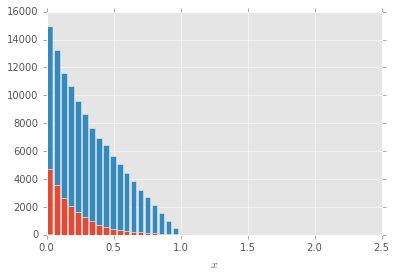

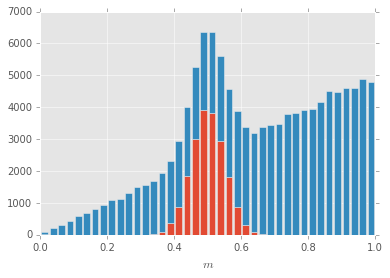

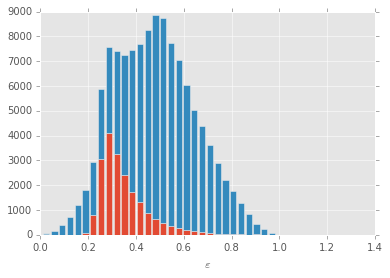

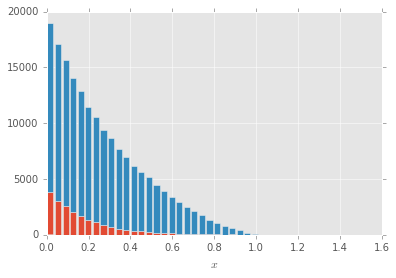

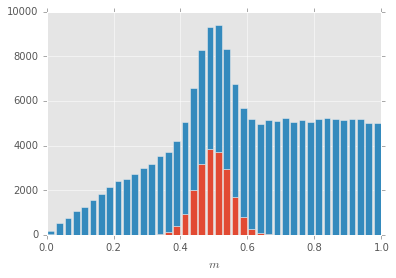

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.optimize import curve_fit

plt.style.use('ggplot')


def generate_sx(size):
    return -0.2 * np.log(np.random.uniform(size=size))


def generate_sm(size):
    return np.random.normal(0.5, 0.05, size=size)


def generate_s(size):
    return np.array([generate_sx(size), generate_sm(size)])


def generate_bx(size):
    return 1 - np.sqrt(np.random.uniform(size=size))


def generate_bm(size):
    return np.sqrt(np.random.uniform(size=size))


def generate_b(size):
    return np.array([generate_bx(size), generate_bm(size)])


def generate_sample(sig_size=20000, bkg_size=100000):
    return np.append(generate_s(sig_size), generate_b(bkg_size), axis=1)


def efficiency(x, m):
    return (x + m) / 2


def generate_with_efficiency(generator, efficiency, size):
    def reset():
        xs, ms = generator(size)
        effs = efficiency(xs, ms)
        accept = np.random.uniform(size=size) > effs
        return np.array([xs[accept], ms[accept]])
    
    sample = reset()
    while sample.shape[1] < size:
        sample = np.append(sample, reset(), axis=1)
    return sample[:size]


def generate_sample_with_efficiency(efficiency, sig_size=20000, bkg_size=100000):
    return np.append(generate_with_efficiency(generate_s, efficiency, sig_size),
                     generate_with_efficiency(generate_b, efficiency, bkg_size),
                     axis=1)


n = 20000
xs, ms = generate_sample()
xs_s, xs_b = xs[:n], xs[n:]
ms_s, ms_b = ms[:n], ms[n:]

plt.hist([xs_s, xs_b], bins=40, histtype='barstacked')
plt.xlabel(r'$x$')
plt.show()

plt.hist([ms_s, ms_b], bins=40, histtype='barstacked')
plt.xlabel(r'$m$')
plt.show()


effs = efficiency(xs, ms)
effs_s, effs_b = effs[:n], effs[n:]
plt.hist([effs_s, effs_b], bins=40, histtype='barstacked')
plt.xlabel(r'$\varepsilon$')
plt.show()

exs, ems = generate_sample_with_efficiency(efficiency)
exs_s, exs_b = exs[:n], exs[n:]
ems_s, ems_b = ems[:n], ems[n:]

plt.hist([exs_s, exs_b], bins=40, histtype='barstacked')
plt.xlabel(r'$x$')
plt.show()

plt.hist([ems_s, ems_b], bins=40, histtype='barstacked')
plt.xlabel(r'$m$')
plt.show()

---
## Aufgabe 1
Bestimmen Sie für beide Effizienzfunktion die sWeights $w(m)$ aus den beobachteten $m$-Verteilungen, und verwenden Sie $w(m)/\varepsilon(x, m)$ um die Verteilung $N_{s}s(x)$ aus den Daten heraus zu projizieren. Vergleichen Sie für beide Effizienzfunktionen das Resultat mit der Erwartung.

---

---
## Aufgabe 2
Bestimmen Sie für $\varepsilon(x, m) = (x + m)/2$ unter Berücksichtigung der Funktion $\varepsilon(x, m)$ in der Bestimmung von $w(m)$ die korrekten sWeights aus den mit $1/\varepsilon(x, m)$ gewichteten Daten. Verwenden Sie die korrekten sWeights um mit $w(m)/\varepsilon(x, m)$ um die Verteilung $N_{s}s(x)$ zu extrahieren.